### 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [4]:
data = pd.read_csv("WA_Marketing-Campaign.csv")

In [5]:
data["MarketID"].unique()
# The promotions method are experimented across 10 different Markets across 920 different locations

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
data["LocationID"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
       101, 102, 103, 104, 105, 106, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 301, 302, 303, 304, 305, 306, 307, 308, 309, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611,
       612, 613, 614, 615, 701, 702, 703, 704, 705, 706, 707, 708, 709,
       710, 711, 712, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810,
       901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,
       914, 915, 916, 917, 918, 919, 920])

In [11]:
data

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [7]:
data["Promotion"]

0      3
1      3
2      3
3      3
4      2
      ..
543    1
544    2
545    2
546    2
547    2
Name: Promotion, Length: 548, dtype: int64

<Axes: xlabel='Promotion'>

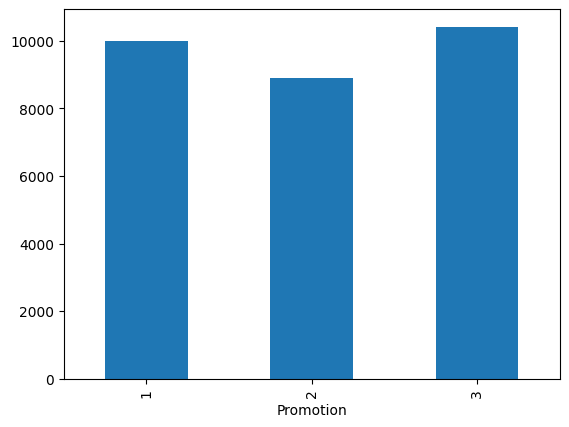

In [54]:
 # comapre the sales of 3 promotion strategies across 4 weeks
plt.figure()
data.pivot_table(index='Promotion',aggfunc="sum")["SalesInThousands"].plot.bar()


<Axes: xlabel='Promotion'>

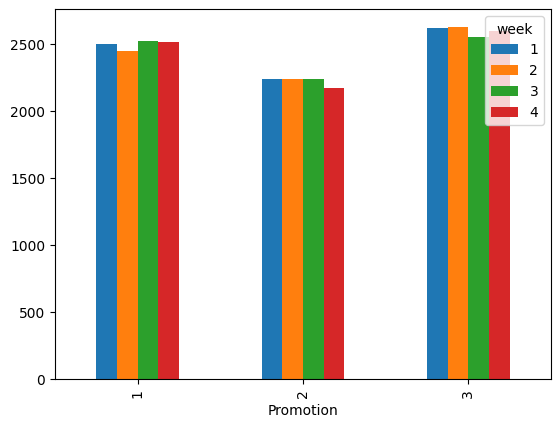

In [30]:
# comapre the sales of 3 promotion strategies across 4 weeks
data.pivot_table(index='Promotion', columns='week',aggfunc="sum")["SalesInThousands"].plot.bar()

### Plot Distribution of data

### Formulate Hypothesis

Null Hypothesis H0      : There is no statistically significant difference between the sales of 3 groups of promotion strategies

Alternate Hypothesis H1 : There is statistically significant difference between the sales of 3 groups of promotion strategies

In [43]:
group_1 = data[data["Promotion"]==1][["SalesInThousands"]].reset_index(drop=True)
group_2 = data[data["Promotion"]==2][["SalesInThousands"]].reset_index(drop=True)
group_3 = data[data["Promotion"]==3][["SalesInThousands"]].reset_index(drop=True)

In [ ]:
# ANOVA is the best method used to compare between groups
k = 3 # 3 groups

from scipy import stats

f_statistic, p_value = stats.f_oneway(group_1, group_2, group_3)

# Assume the critical value alpha to be 0.01
alpha = 0.01

p_value<=alpha

array([ True])

Conclusion from ANOVA

1. Since p_value<=alpha is True, we can reject the null hypothesis. Hence we can conclude that there is statistically significant difference between the means of 3 groups

2. But we don't know which promotion stragegy among 2 and 3 has the significant change from the first promotion strategy. Assuming that the control group is promotion 1, and test groups are promotion 2 and promotion 3, lets try z-test to frind which promotion method has statistically significant change compared to pormotion 1.

### T-test - Promotion 1 vs Promotion 2

H0 : Sales of the sample data with Promotion method 2 has no signifant difference from that of sample data with promotion method 1.

H1 : Sales of the sample data with Promotion method 2 has signifant difference from that of sample data with promotion method 1.

Lets assume the level of significance as alpha = 0.01

In [64]:
group_1.shape,group_2.shape,group_3.shape

((172, 1), (188, 1), (188, 1))

In [70]:
static, p_value = stats.ttest_ind(group_1["SalesInThousands"],group_2["SalesInThousands"])

In [72]:
static, p_value

(np.float64(6.453671702181005), np.float64(3.5506696512134566e-10))

In [75]:
p_value < 0.01
# Since p_value less than the critical value we cannot reject the null hypothesis.

np.True_

### T-test - Promotion 1 vs Promotion 3

In [77]:
static, p_value = stats.ttest_ind(group_1["SalesInThousands"],group_3["SalesInThousands"])

In [78]:
static, p_value

(np.float64(1.5551383687293547), np.float64(0.12079667272313277))

In [ ]:
p_value < 0.01
# Since p_value greater than the critical value we can reject the null hypothesis.
# We can say that the sample where we applied promotion strategy 3 has significant diference from the promotion strategy 1

np.False_

### Conclusions

1. From the ANOVA test using 3 samples with different promotion strategies we found that there is a significant difference in the sales between the 3 groups

2. From the individual T-tests we found that there is no statistically significant change in sales between the Promotion strategy 1 and 2. But there is significant change in sales between the groups Promotion strategy 1 and 3.